<a href="https://colab.research.google.com/github/rj-adity/Aditya_Bright_Automative_company_analysis_CS4N/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demonstrate the use of density-based clustering methods using DBSCAN**.

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
url="https://raw.githubusercontent.com/rj-adity/titanic_spaceship/refs/heads/main/Mall_Customers.csv"

In [3]:
df=pd.read_csv(url)

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X = StandardScaler().fit_transform(X)

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

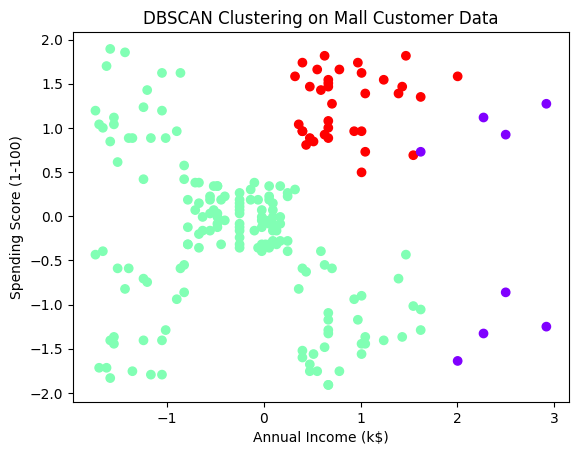

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering on Mall Customer Data')
plt.show()

In [8]:
# Add the cluster labels to the original dataframe
df['Cluster'] = labels

# Create a summary table
cluster_summary = df.groupby('Cluster').agg(
    Customer_Count=('Cluster', 'size'),
    Avg_Annual_Income=('Annual Income (k$)', 'mean'),
    Avg_Spending_Score=('Spending Score (1-100)', 'mean')
).reset_index()

# Display the summary table
print(cluster_summary)

   Cluster  Customer_Count  Avg_Annual_Income  Avg_Spending_Score
0       -1               8         122.750000           46.875000
1        0             157          52.490446           43.101911
2        1              35          82.542857           82.800000
